Importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data preprocessing

#Training Image preprocessing

# New Section

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/spill_no-spill classification/Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 274 files belonging to 2 classes.


#Validation Image preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/spill_no-spill classification/Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 41 files belonging to 2 classes.


In [ ]:
cnn =tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
9/9 [==============================] - 32s 991ms/step - loss: 183.7023 - accuracy: 0.5219 - val_loss: 0.6948 - val_accuracy: 0.2195
Epoch 2/30
9/9 [==============================] - 4s 369ms/step - loss: 0.8183 - accuracy: 0.5328 - val_loss: 0.6637 - val_accuracy: 0.8537
Epoch 3/30
9/9 [==============================] - 5s 485ms/step - loss: 0.6905 - accuracy: 0.6131 - val_loss: 0.6828 - val_accuracy: 0.5854
Epoch 4/30
9/9 [==============================] - 4s 368ms/step - loss: 0.6562 - accuracy: 0.7263 - val_loss: 0.4528 - val_accuracy: 0.8537
Epoch 5/30
9/9 [==============================] - 4s 352ms/step - loss: 0.6937 - accuracy: 0.6095 - val_loss: 0.5114 - val_accuracy: 0.8049
Epoch 6/30
9/9 [==============================] - 5s 471ms/step - loss: 1.0451 - accuracy: 0.6642 - val_loss: 1.0147 - val_accuracy: 0.8049
Epoch 7/30
9/9 [==============================] - 4s 354ms/step - loss: 0.8562 - accuracy: 0.6533 - val_loss: 0.4511 - val_accuracy: 0.9024
Epoch 8/30
9/9 [=

In [ ]:
training_history.history

{'loss': [183.70233154296875,
  0.8182650804519653,
  0.6905490159988403,
  0.6562113165855408,
  0.6936675906181335,
  1.0451210737228394,
  0.8562029600143433,
  0.6194468140602112,
  0.8244835138320923,
  2.430055618286133,
  1.2355602979660034,
  0.7980330586433411,
  0.6650897264480591,
  1.0605696439743042,
  0.43704068660736084,
  0.7117232084274292,
  0.5883810520172119,
  0.3529622554779053,
  0.2771739363670349,
  0.30760014057159424,
  0.904954731464386,
  0.39388570189476013,
  0.2387387901544571,
  0.31199657917022705,
  0.7578190565109253,
  0.2196449190378189,
  1.9198939800262451,
  0.30558207631111145,
  0.23616120219230652,
  0.38193854689598083],
 'accuracy': [0.5218977928161621,
  0.5328466892242432,
  0.6131386756896973,
  0.7262773513793945,
  0.6094890236854553,
  0.6642335653305054,
  0.6532846689224243,
  0.7554744482040405,
  0.6678832173347473,
  0.5802919864654541,
  0.6386861205101013,
  0.6970803141593933,
  0.7992700934410095,
  0.7153284549713135,
  0.85

In [ ]:
cnn.save("trained_petr.model.h5")

In [ ]:
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
print('Validation set Accuracy: {} %'.format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 80.48780560493469 %


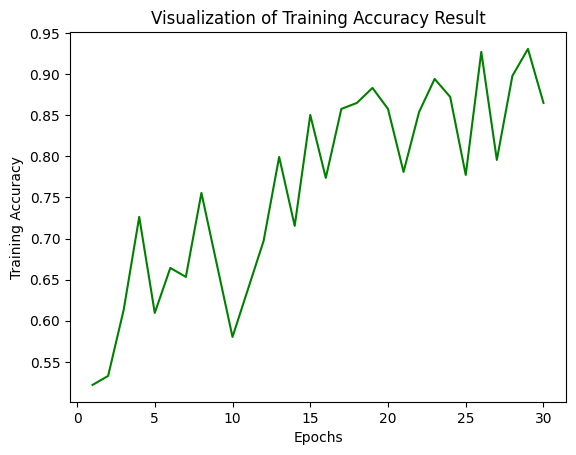

In [ ]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='g')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title("Visualization of Training Accuracy Result")
plt.show()

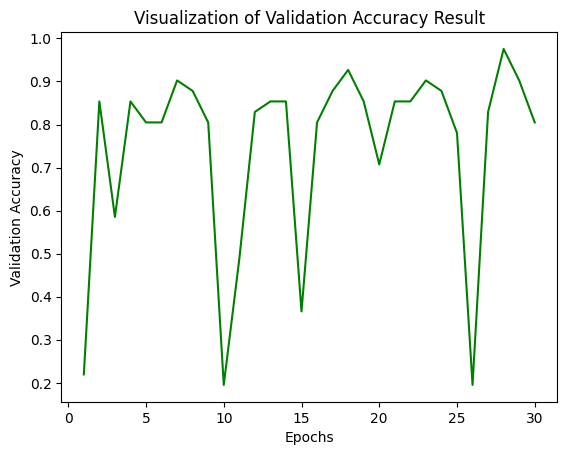

In [ ]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['val_accuracy'],color='g')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title("Visualization of Validation Accuracy Result")
plt.show()